In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
R_ref = 3
s_B = 1
s_J = 1
q = 2/3

r = np.linspace(0, 1, 50)
theta = np.linspace(0, 2*np.pi, 100)
phi = np.linspace(0, 2*np.pi, 100)

r, theta, phi = np.meshgrid(r, theta, phi, indexing='ij')

In [3]:
R = R_ref + r*np.cos(theta)
x = R * np.cos(phi)
y = R * np.sin(phi)
z = r * np.sin(theta)

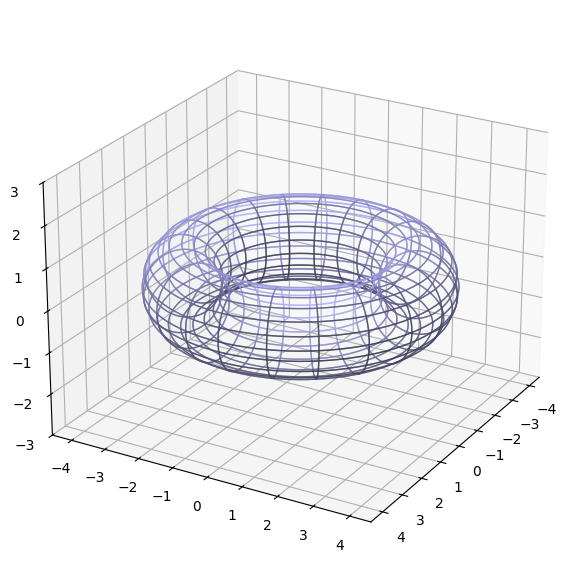

In [ ]:
cond = np.s_[-1,:,:]

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(121, projection='3d')
ax.set_zlim(-3,3)
ax.plot_surface(x[cond], y[cond], z[cond], 
                rstride=5, 
                cstride=5,
                color=(0,0,0,0),
                edgecolors=(0.7,0.7,1,0.7))
ax.view_init(24, 30)

plt.show()

### s-α Geometry

In [5]:
eps = r/R_ref
s = theta/(2*np.pi)
zeta = (s_B*s_J)/(2*np.pi) * (np.abs(q)*theta - phi) 

### Circ Geometry
$\psi(r) = \frac{r}{R_{ref}}$

$s(r, \theta) = \frac{1}{2\pi} \left[\theta + \psi \sin \theta\right]$

$\zeta(r, \theta, \varphi) = -\frac{\varphi}{2\pi} + s_B s_j \frac{|q|}{\pi} \arctan \left[ \sqrt{\frac{1-\psi}{1+\psi}} \tan\frac{\theta}{2}\right]$

In [6]:
psi = r/R_ref
s = 1/(2*np.pi)*(theta + psi*np.sin(theta))
zeta = - phi/(2*np.pi) + s_B*s_J*np.abs(q)/np.pi * np.arctan(np.sqrt((1-psi)/(1+psi)) * np.tan(theta/2))
# zeta = zeta % 1

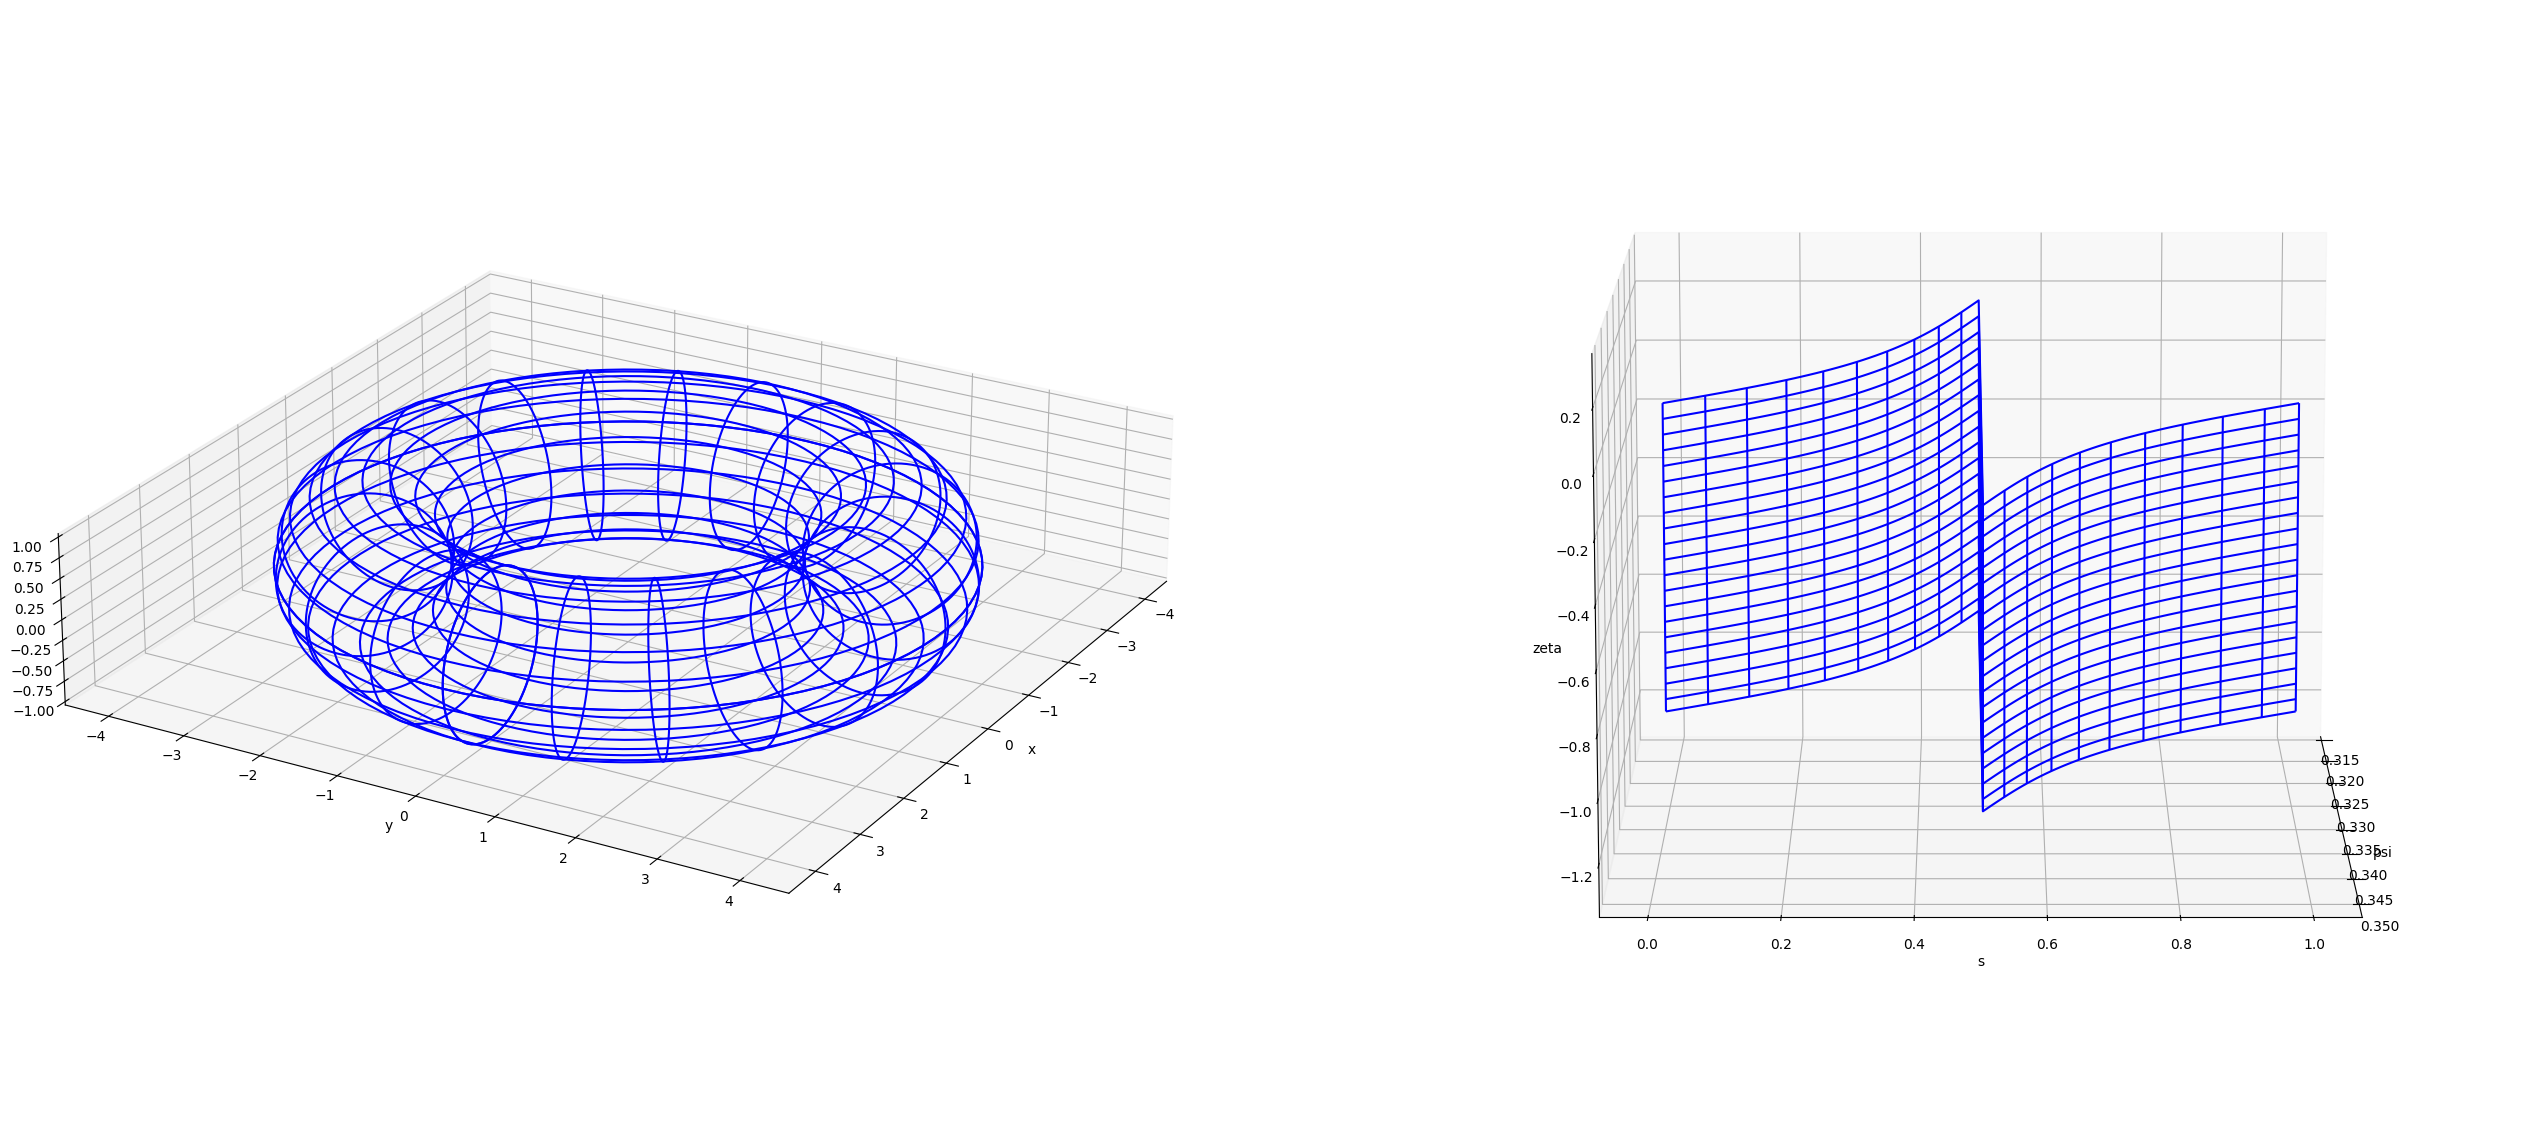

In [19]:
conds = [np.s_[-1,:,:]]

fig, axs = plt.subplots(1, 2, figsize=(32,16), subplot_kw={'projection': '3d'})

for cond in conds:
    axs[0].plot_wireframe(x[cond], y[cond], z[cond], 
                    rstride=5, 
                    cstride=5,
                    color='b')

    axs[1].plot_wireframe(psi[cond], s[cond], zeta[cond], 
                    rstride=5, 
                    cstride=5,
                    color='b')
    
    
axs[0].view_init(24, 30)
axs[0].set_aspect('equal')
axs[0].set(xlabel='x', ylabel='y', zlabel='z')

axs[1].view_init(12,0)
axs[1].set(xlabel='psi', ylabel='s', zlabel='zeta')

plt.show()